# 1. 범주형변수

# 1-1. 원핫 인코딩

# 1-2. 구간 분할, 이산화 그리고 선형 모델, 트리 모델

In [2]:
# 폰트
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)


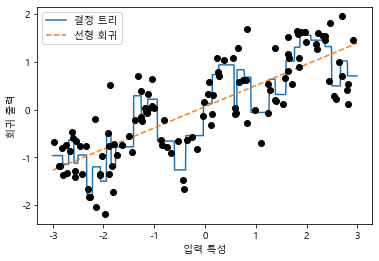

In [3]:
import mglearn 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show() # 책에는 없음

# 1-3. KBinsDiscretizer

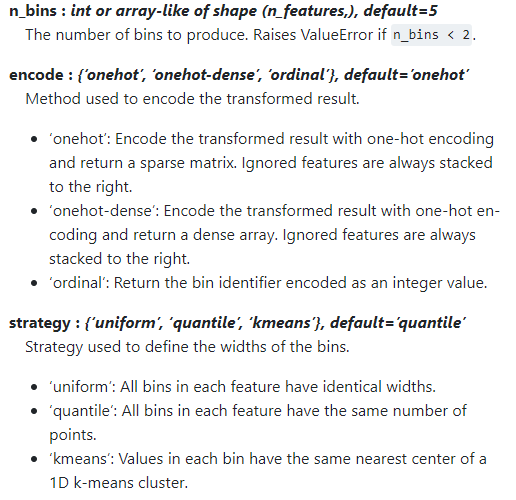

In [5]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print(f'bin edges: \n {kb.bin_edges_}')

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


In [6]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [7]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [11]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)
X.shape # 120x1
X_binned.shape # 120x10

(120, 1)

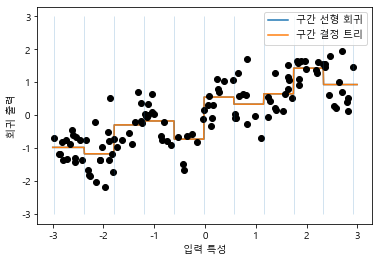

In [12]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.show() # 책에는 없음

# 1-4. 상호작용과 다항식
- 위와 같은 데이터는 데이터의 분포가 곡선으로 나타나기 때문에 일반적인 선형회귀로 해결할 수 없다. (비선형)

> 따라서 다항 회귀를 사용한다. 다항회귀란 위와 같이 데이터들간의 형태가 비선형 일때 데이터에 각 특성의 제곱을 추가해주어서 특성이 추가된 비선형 데이터를 선형 회귀 모델로 훈련시키는 방법이다.

# 1-4-1. Wave 데이터셋을 이용한 모델비교1
- 원본 특성을 더한 선형 회귀
- 절편 및 기울기를 학습한 선형회귀 모델 구성

In [17]:
X_combined = np.hstack([X, X_binned])
print(X.shape) # 120x1
print(X_binned.shape) # 120x10
print(X_combined.shape) # 120x11

(120, 1)
(120, 10)
(120, 11)


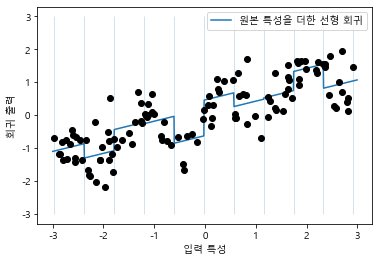

In [21]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X, y, 'o', c='k')
plt.show() 

#### 위의 모델은 각 구간의 절편과 기울기를 학습
#### 학습된 기울기는 음수이고 모든 구간에 걸쳐 동일(x축 특성이 하나이므로 기울기도 하나)
* 기울기가 모든 구간에서 같으니 유익해 보이지 않음
* 각 구간에서 다른 기울기를 가지는게 좋다.
* 이런 효과를 위해서 데이터 포인트가 있는 구간과 x축 사이의 상호작용 특성을 추가
* 구간 특성과 원본 특성의 곱


# 1-4-2. Wave 데이터셋을 이용한 모델비교2
- 원본 특성을 곱한 선형 회귀
- 각 구간에서 다른 절편, 기울기를 학습한 선형회귀 모델 구성

In [22]:
'''
데이터 포인트가 속한 구간과 이 구간에 원본 특성을 곱한 값을 더해 20개의 특성을 가짐.
'''
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape) # 120x20

(120, 20)


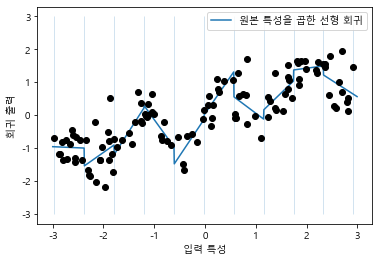

In [25]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line*line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X, y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show() 

### 다항회귀(PolynomialFeatures)
- preprocessing 모델의 PolynomialFeatures(다항회귀) 사용
- 다항식 특성 영향

# 1-4-3. Wave 데이터셋을 이용한 모델 비교3
* 10차 다항식을 이용한 회귀 모델 구성
* 다항식 특성은 1차원 데이터셋에서도 매우 부드러운 곡선을 만듬
* 고차원 다항식은 데이터가 부족한 영역에서 민감하게 동작

In [29]:
from sklearn.preprocessing import PolynomialFeatures

# degree -> x ** 10까지 고차항을 추가합니다
# 기본값인 "include_bias=True"는 절편에 해당하는 1인 특성을 추가합니다
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
X_poly.shape # 120 x 10

(120, 10)

In [30]:
print("X 원소:\n", X[:5])
print("X_poly 원소:\n", X_poly[:5]) # 제곱, 3제곱, ... 10제곱까지 한거임.

X 원소:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


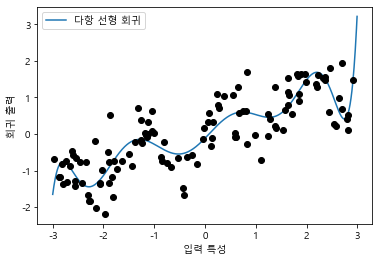

In [31]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show() # 책에는 없음

### 다항식 특성 영향

# 1-4-4. Wave 데이터셋을 이용한 모델 비교4
* RBF 커널 SVM의 gamma 매개변수 변화에 따른 비교
* 더 복잡한 모델인 터널 SVM을 사용해 특성 데이터를 변환하지 않고 
* 다항 회귀와 비슷한 복잡도를 가진 예측을 만듬


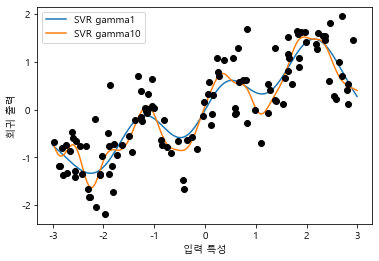

In [32]:
from sklearn.svm import SVR
for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line
             , svr.predict(line)
             , label='SVR gamma{}'.format(gamma))
plt.plot(X, y, 'o', c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')
plt.show()

# 2. 보스턴 주택 가격 데이터셋을 이용한 다항식 특성 적용
- 스케일 조정(MinMaxScalar) 후 다항식 특성 추출

In [34]:
# 경고 메시지를 피하기 위해 다음 코드를 추가합니다.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [47]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data
                                                   ,boston.target
                                                   ,random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape # 379x13
X_test_scaled.shape # 127x13
y_test.shape # 127,1
X_train_scaled[0]

array([0.00207947, 0.22      , 0.19794721, 0.        , 0.09465021,
       0.39164591, 0.6930999 , 0.61911197, 0.26086957, 0.27290076,
       0.69148936, 0.98040748, 0.47460993])

## 2-1. 다항식 특성 확장
* 원래 특성 13개가 특성 조합으로 특성 곱 및 다항식 특성 추가하여 105 개로 확장
* degree=2로하면 원본 특성에서 두 개를 뽑아 만들 수 있는 모든 곱을 얻음


In [51]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
X_train_poly.shape # 379x105
X_test_poly.shape # 127x105
X_train_poly[0]

array([1.00000000e+00, 2.07946779e-03, 2.20000000e-01, 1.97947214e-01,
       0.00000000e+00, 9.46502058e-02, 3.91645909e-01, 6.93099897e-01,
       6.19111967e-01, 2.60869565e-01, 2.72900763e-01, 6.91489362e-01,
       9.80407484e-01, 4.74609929e-01, 4.32418630e-06, 4.57482914e-04,
       4.11624856e-04, 0.00000000e+00, 1.96822054e-04, 8.14415054e-04,
       1.44127891e-03, 1.28742340e-03, 5.42469859e-04, 5.67488348e-04,
       1.43792986e-03, 2.03872579e-03, 9.86936062e-04, 4.84000000e-02,
       4.35483871e-02, 0.00000000e+00, 2.08230453e-02, 8.61621000e-02,
       1.52481977e-01, 1.36204633e-01, 5.73913043e-02, 6.00381679e-02,
       1.52127660e-01, 2.15689646e-01, 1.04414184e-01, 3.91830996e-02,
       0.00000000e+00, 1.87357445e-02, 7.75252166e-02, 1.37197194e-01,
       1.22551489e-01, 5.16384037e-02, 5.40199458e-02, 1.36878393e-01,
       1.94068930e-01, 9.39477132e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [54]:
print(f'다항 특성 이름: \n {poly.get_feature_names_out()}')

다항 특성 이름: 
 ['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12'
 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8'
 'x0 x9' 'x0 x10' 'x0 x11' 'x0 x12' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5'
 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x1 x10' 'x1 x11' 'x1 x12' 'x2^2' 'x2 x3'
 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x2 x10' 'x2 x11'
 'x2 x12' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x3 x10'
 'x3 x11' 'x3 x12' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7' 'x4 x8' 'x4 x9' 'x4 x10'
 'x4 x11' 'x4 x12' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8' 'x5 x9' 'x5 x10'
 'x5 x11' 'x5 x12' 'x6^2' 'x6 x7' 'x6 x8' 'x6 x9' 'x6 x10' 'x6 x11'
 'x6 x12' 'x7^2' 'x7 x8' 'x7 x9' 'x7 x10' 'x7 x11' 'x7 x12' 'x8^2' 'x8 x9'
 'x8 x10' 'x8 x11' 'x8 x12' 'x9^2' 'x9 x10' 'x9 x11' 'x9 x12' 'x10^2'
 'x10 x11' 'x10 x12' 'x11^2' 'x11 x12' 'x12^2']


# 2-2.상호작용 특성 있는 데이터와 없는 데이터에 대한 릿지회귀 결과
- 선형 모델은 영향을 받지만 랜덤 포레스트처럼 복잡한 모델은 차이가 없음

In [57]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print(f'상호작용 특성이 없을 때 점수 : {ridge.score(X_test_scaled, y_test):.3f}')

ridge = Ridge().fit(X_train_poly, y_train)
print(f'상호작용 특성이 있을 때 점수 : {ridge.score(X_test_poly, y_test):.3f}')

상호작용 특성이 없을 때 점수 : 0.621
상호작용 특성이 있을 때 점수 : 0.753


In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.775


#### 특성을 추가하지 않아도 랜덤 포레스트는 Ridge의 성능과 맞먹음.

#### 오히려 상호작용과 다항식을 추가하면 성능이 조금 줄어든다.

* 제곱항이나 세제곱 항을 추가하면 선형 회귀 모델에 도움이 됨


# 3. 일번량 비선형 변환
### 3-1. 실제 데이터 속성과 비슷한 랜덤 카운트 데이터 생성
- 특성 값 데이터는 모두 정수이며 3개의 특성은 실수

In [61]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3) # 3x1

X = rnd.poisson(10 * np.exp(X_org)) # 1000 x 3
y = np.dot(X_org, w) 1000 x 1
print(X[:10,0])

[ 56  81  25  20  27  18  12  21 109   7]


In [71]:
# 0:28번, 1: 38번, 2: 68번
print(f'특성 출현 횟수: \n {np.bincount(X[:,0])}')

특성 출현 횟수: 
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


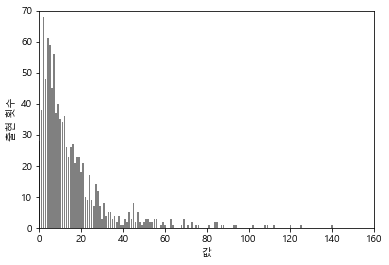

In [73]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")
plt.show() # 책에는 없음

> 데이터가 한쪽으로 치우쳐져있는것은 정규분포 시켜야 결과가 좋아진다.

## 3-2. 카운트 데이터를 사용한 일변량 비선형 변환
#### 트리 기반 모델은 특성의 순서에만 영향을 받지만, 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관
* 특성과 타깃값 사이에 비선형성이 있다면 특히 선형 회귀에서는 모델을 만들기가 어려움
* 대부분  모델은 각 특성이 **정규분포**와 비슷할 때 최고의 성능을 나타냄
* 정수 카운트 데이터의 히스토그램

## 3-2-1. 선형 릿지회귀 적용
- 분포가 한쪽으로 치우쳐있는 데이터를 이용
    - 비교적 낮은 R2점수 나옴 - Ridge는 제대로 모델링하지 못함

In [74]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X
                                                    ,y
                                                    ,random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print(f'테스트점수 {score: .3f}')


테스트점수  0.622


## 3-2-2. 로그 스케일로 데이터 변환
- 분포가 한쪽으로 치우쳐있는 데이터를 이용
    - 0인 데이터를 위해 log(X)대신 log(X+1)을 사용

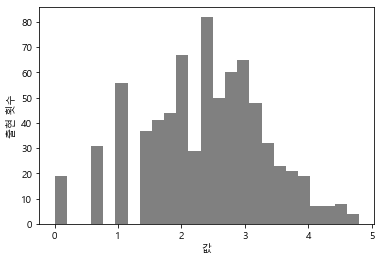

In [75]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:,0], bins=25, color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")
plt.show()

#### 데이터 변환은 선형 모델에서는 필수지만 트리 모델에서는 불필요함
* 트리기반 모델은 스스로 중요한 상호작용을 찾아낼 수 있고 대부분의 경우 데이터를 명시적으로 변환하지 않아됨

#### 구간분할, 다항식, 상호작용 등 데이터 변환의 모델 성능 영향 정도
* 선형모델/나이브베이즈 > SVM, 최근접이웃, 신경망 > 트리기반 모델


# 4. 일변량 통계
### 유방암 데이터셋에 분류 특성 선택 적용
- 의미 없는 노이즈 특성을 데이터에 추가

#### 사이킷런에서 일변량 분석으로 특성을 선택하려면 
* 분류에서는 f_classif, 회귀 r_regression을 선택
* 임계값을 계산하는 방법 
    SelectKBest:고정된 K개의 특성을 선택,SelectPercentile:지정된 비율만큼 특성을 선택


In [92]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer() # 569 x 30

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))  # 569 x 50
# 처음 30개는 원본 특성이고, 50개는 노이즈(데이터에 노이즈 추가)
noise.shape # 569 x 50

X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise
                                                    , cancer.target
                                                    , random_state=0
                                                    , test_size=.5)

# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택합니다
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
# 훈련 세트에 적용합니다
X_train_selected = select.transform(X_train)

print("X_train.shape:", X_train.shape)
print("X_train_selected.shape:", X_train_selected.shape)

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


- 특성이 80 -> 40개로 줄어듦
- get_support() 메소드는 선택된 특성을 boolean값으로 표시

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


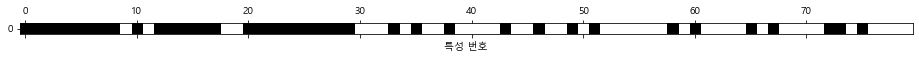

In [95]:
mask = select.get_support()
print(mask)
# True = 검은색, False=흰색
mask.shape # 80x1
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('특성 번호')
plt.yticks([0])
plt.show()

> * 선택 특성은 대부분 원본 특성이며 노이즈 특성이 거의 제거됨

## 4-1. 유방암 데이터셋에 분류 특성 선택 적용
#### 전체 특성 이용 경우와 선택 특성 이용 경우의 로지스틱 회귀 성능 비교
* 노이즈 특성을 제거했을 때 성능이우수


In [100]:
from sklearn.linear_model import LogisticRegression
# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print(f'전체 특성을 사용한 점수 {lr.score(X_test, y_test) : .3f}')

lr.fit(X_train_selected, y_train)
print(f'선택된 일부 특성을 사용한 점수 {lr.score(X_test_selected, y_test) : .3f}')


전체 특성을 사용한 점수  0.951
선택된 일부 특성을 사용한 점수  0.937


# 4-2. 모델 기반 특성 선택
#### 유방암 데이터셋에 대한 모델 기반 특성 성택
- 모델 기반 특성 선택은 SelectModel 클래스 사용

- 일변량 분석 특성 선택과 비교 위해 중간값을 임계치로 선택
- 트리 100개로 만든 랜덤 포레스트 분류기로 특성 중요도 계산

In [103]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select =SelectFromModel(RandomForestClassifier(n_estimators=100
                                               , random_state=42)
                       , threshold='median')

In [104]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:", X_train.shape) # 284 x 80
print("X_train_l1.shape:", X_train_l1.shape) # 284 x 40

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


#### 선택 특성 시각화
- 2개를 제외한 모든 원본 특성 선택

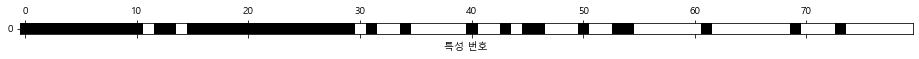

In [105]:
mask = select.get_support()
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])
plt.show() # 책에는 없음

#### 일변량 통계 방식에 비해 성능이 향상되었다

In [106]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.947


## 4-3. 반복적 특성 선택 
### 유방암 데이터셋에 대한 RFE(Recursive Feature Elimination) 적용
### 4-3-1.랜덤포레스트 분류 모델 사용
* 1개를 제외한 모든 원본 특성 선택
* 모든 특성으로 시작해서 모델을 만들고 중요도가 가장 낮은 특성을 제거


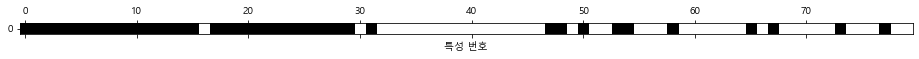

In [107]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# 선택된 특성을 표시합니다
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])
plt.show()

### 유방암 데이터셋에 대한 RFE적용
### 4-3-2. 로지스틱회귀의 정확도 확인

In [109]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.940


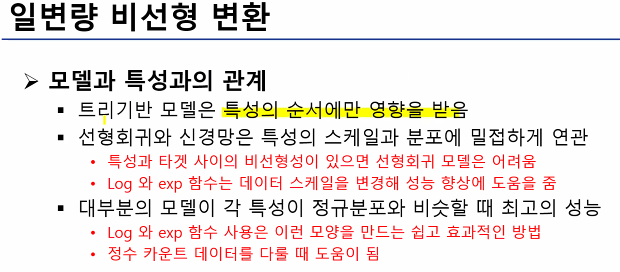

# 5. 전문가 지식 활용
- 8월 한 달 동안의 대여 횟수를 그래프로 표시

In [132]:
import pandas as pd
import mglearn
citibike = mglearn.datasets.load_citibike()

In [130]:
# DATA_PATH = os.path.join(os.path.dirname(os.getcwd()), "data")
# DATA_PATH

'C:\\SeSAC\\python-study_sourcetree\\data'

In [133]:
citibike.shape # 248 x 1
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

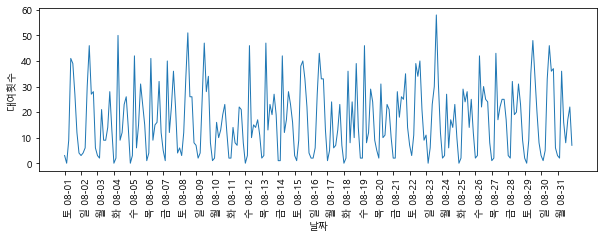

In [134]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
week = ["일", "월", "화","수", "목", "금", "토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"), 
                                              xticks.strftime(" %m-%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")
plt.show() # 책에는 없음

In [135]:
# 타깃값 추출 (대여 횟수)
y = citibike.values
# 판다스 1.3.0에서 datetime을 astype()으로 정수로 바꾸는 것이 deprecated되었고 향후 삭제될 예정입니다.
# 대신 view()를 사용합니다.
# POSIX 시간을 10**9로 나누어 변경
X = citibike.index.view("int64").reshape(-1, 1) // 10**9

In [137]:
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용합니다
n_train = 184 # 23일치 * 8

# 주어진 특성을 사용하여 평가하고 그래프를 만듭니다
def eval_on_features(features, target, regressor):
    # 훈련 세트와 테스트 세트로 나눕니다
    X_train, X_test = features[:n_train], features[n_train:]
    # 타깃값도 나눕니다
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")
    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="테스트")
    plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',label="테스트 예측")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")

## 5-1. 랜덤포레스트 회귀모델 적용
- 범위 밖의 테스트 데이터에 대해서는 학습이 안되네.

테스트 세트 R^2: -0.04


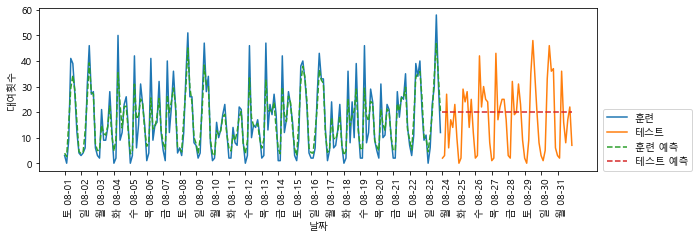

In [138]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

## 5-2. 시간 특성 추가
- 시간 특성을 추가하였더니 정확도 60%까지 증가

테스트 세트 R^2: 0.60


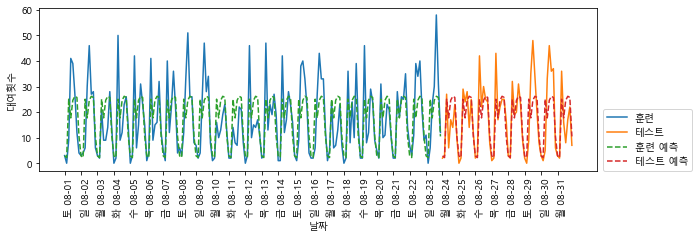

In [139]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

## 5-3.요일, 시간 특성 추가
- 요일, 시간 특성을 추가하였더니 정확도 84%까지 증가

테스트 세트 R^2: 0.84


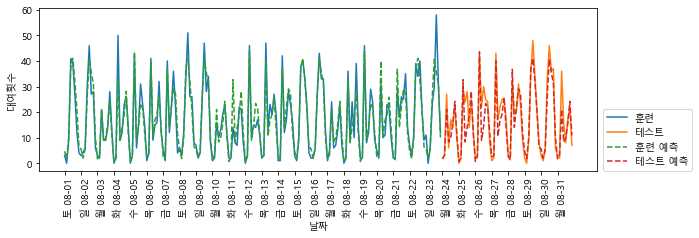

In [143]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

## 5-4. 선형회귀 모델 적용
- 선형회귀에 대해서는 정확도가 13%로 낮은편

테스트 세트 R^2: 0.13


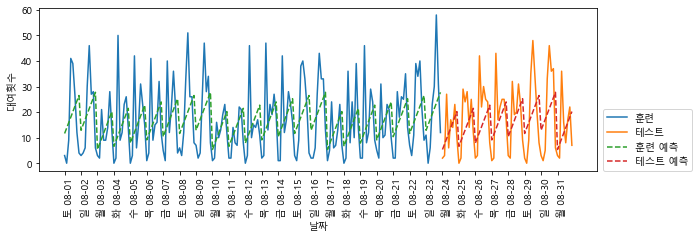

In [144]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

## 5-5. 시간, week를 원핫인코딩으로 변경 후 Ridge 모델적용
- 정확도62%

테스트 세트 R^2: 0.62


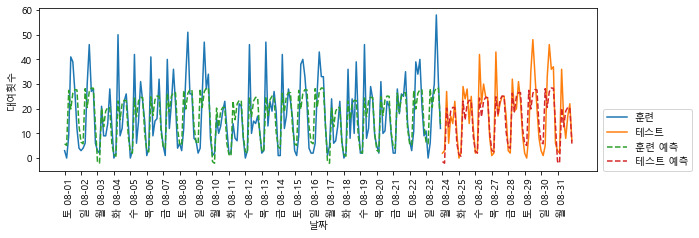

In [147]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())

## 5-6.시간/ 요일 조합한 상호작용 특성을 사용하여 선형회귀 모델에 적용
- PolynomialFeatures(다항회귀) degree=2이므로 2차원 다항회귀식을 이용하여 x^2표현
- 85%

테스트 세트 R^2: 0.85


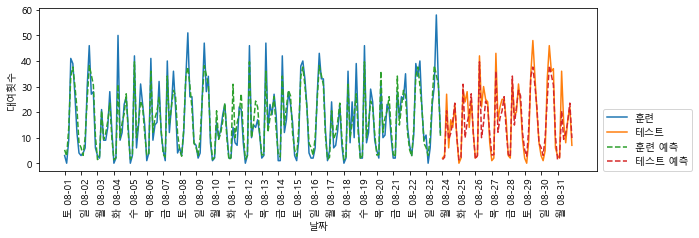

In [148]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

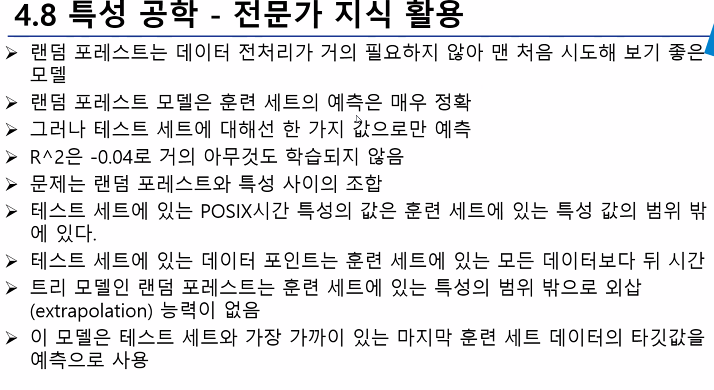

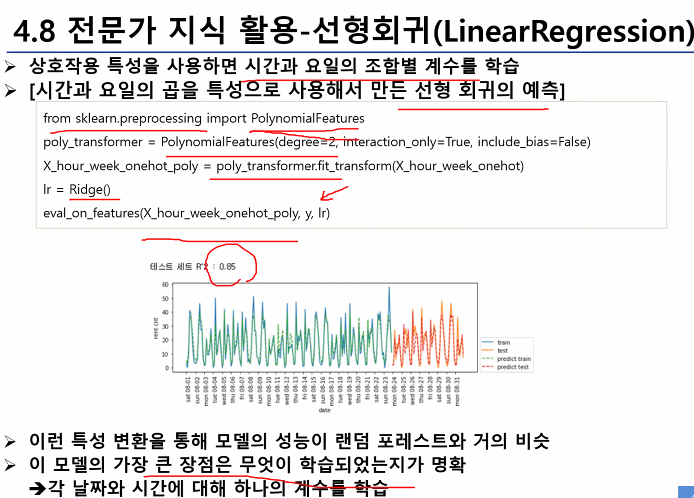

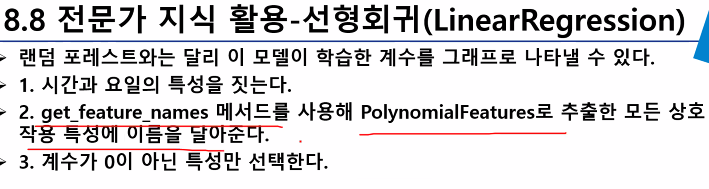

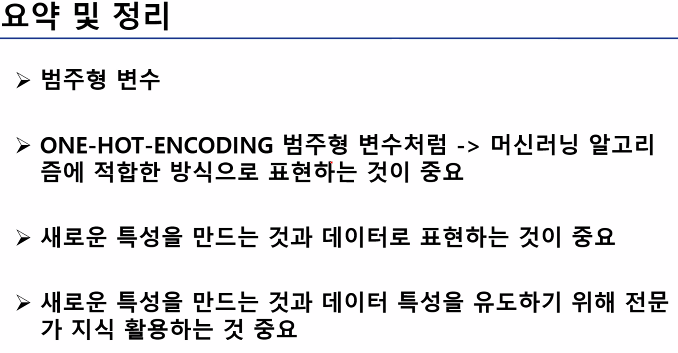